# Text Clustering
---

In [1]:
with open('../data/synopses_list_imdb.txt', 'r') as f:
    synopses = f.read()

with open('../data/title_list.txt', 'r') as f:
    titles = f.read().split('\n')

with open('../data/genres_list.txt', 'r') as f:
    genres = f.read().split('\n')

dict_movies_and_synopsis = {
    title: text.replace("\n", '').strip()  
    for title,text 
    in zip(titles, synopses.split("BREAKS HERE"))
    if len(text.replace("\n", '').strip()) > 1
}

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

In [8]:
df_movies_genres_synopsis = \
pd.DataFrame(data=[syn.replace("\n", '').strip() for syn in synopses.split("BREAKS HERE")], 
             index=titles, 
             columns=['Synopsis']).assign(Genres=genres).assign(length_synopsis=lambda fr: fr['Synopsis'].map(len)).query("length_synopsis > 1").drop(columns=['length_synopsis'])

df_movies_genres_synopsis

,Synopsis,Genres
The Godfather,"In late summer 1945, guests are gathered for t...","[u' Crime', u' Drama']"
The Shawshank Redemption,"In 1947, Andy Dufresne (Tim Robbins), a banker...","[u' Crime', u' Drama']"
Schindler's List,The relocation of Polish Jews from surrounding...,"[u' Biography', u' Drama', u' History']"
Raging Bull,"The film opens in 1964, where an older and fat...","[u' Biography', u' Drama', u' Sport']"
Casablanca,"In the early years of World War II, December 1...","[u' Drama', u' Romance', u' War']"
...,...,...
Double Indemnity,Walter Neff (MacMurray) is a successful insura...,"[u' Crime', u' Drama', u' Film-Noir', u' Thril..."
Rebel Without a Cause,Shortly after moving to Los Angeles with his p...,[u' Drama']
Rear Window,"L.B. ""Jeff"" Jeffries (James Stewart) recuperat...","[u' Mystery', u' Thriller']"
The Third Man,"Sights of Vienna, Austria, flash across the sc...","[u' Film-Noir', u' Mystery', u' Thriller']"


# TfidfVectorizer
---



In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [21]:
CountVectorizer().fit_transform(df_movies_genres_synopsis['Synopsis']).shape

(90, 13503)

In [20]:
TfidfVectorizer().fit_transform(df_movies_genres_synopsis['Synopsis']).shape

(90, 13503)

In [43]:
tfidf = TfidfVectorizer(max_df=0.85, 
                        min_df=0.15, 
                        stop_words='english', 
                        ngram_range=(1, 3))

tfidf.fit(df_movies_genres_synopsis['Synopsis'])

tfidf_array = tfidf.transform(df_movies_genres_synopsis['Synopsis']).toarray().round(3)

In [44]:
df_tfidf = pd.DataFrame(data=tfidf_array, columns=tfidf.get_feature_names_out(), index=df_movies_genres_synopsis.index)

In [106]:
df_tfidf.sample(10)

,000,able,accepts,accident,act,acting,action,actually,admits,ago,...,works,world,world war,world war ii,wounded,wrong,year,years,york,young
Ben-Hur,0.0,0.000,0.064,0.000,0.000,0.000,0.000,0.000,0.00,0.000,...,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.085,0.000,0.129
Casablanca,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.081,0.00,0.000,...,0.000,0.124,0.075,0.083,0.000,0.0,0.000,0.052,0.000,0.000
Pulp Fiction,0.0,0.041,0.000,0.000,0.000,0.052,0.000,0.000,0.00,0.000,...,0.045,0.077,0.093,0.052,0.052,0.0,0.000,0.000,0.000,0.066
Vertigo,0.0,0.035,0.000,0.000,0.000,0.000,0.000,0.000,0.04,0.000,...,0.000,0.000,0.000,0.000,0.000,0.0,0.035,0.000,0.000,0.000
American Graffiti,0.0,0.012,0.000,0.015,0.015,0.000,0.031,0.000,0.00,0.000,...,0.000,0.000,0.000,0.000,0.000,0.0,0.012,0.000,0.000,0.030
Rear Window,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,...,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.040,0.000
Braveheart,0.0,0.024,0.000,0.000,0.029,0.000,0.000,0.000,0.00,0.000,...,0.000,0.000,0.000,0.000,0.000,0.0,0.023,0.075,0.025,0.076
Saving Private Ryan,0.0,0.054,0.021,0.000,0.022,0.023,0.023,0.000,0.00,0.021,...,0.000,0.017,0.000,0.000,0.138,0.0,0.000,0.014,0.000,0.058
The Apartment,0.0,0.000,0.076,0.000,0.000,0.000,0.000,0.000,0.00,0.000,...,0.000,0.000,0.000,0.000,0.000,0.0,0.063,0.051,0.068,0.000
2001: A Space Odyssey,0.0,0.084,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.099,...,0.000,0.000,0.000,0.000,0.000,0.0,0.041,0.033,0.000,0.033


# Visualize in 2D
---

In [97]:
from sklearn.manifold import TSNE

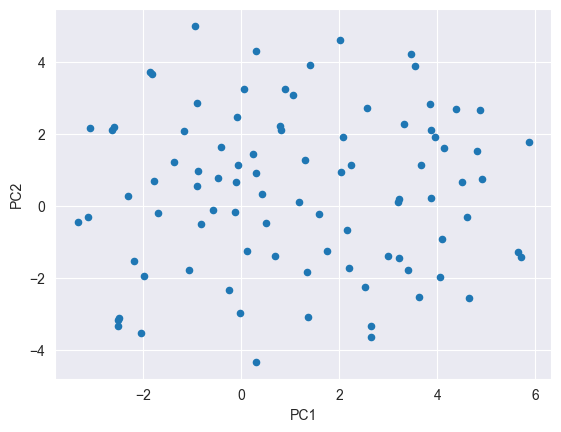

In [103]:
df_tsne = pd.DataFrame(data=TSNE(n_components=2).fit_transform(df_tfidf.values), columns=['PC1', 'PC2'])
df_tsne.plot.scatter(x='PC1', y='PC2');

# Cluster
---

In [99]:
from sklearn.cluster import KMeans

In [115]:
km = KMeans(n_clusters=5).fit(df_tfidf.values)

In [116]:
pd.Series(km.labels_).value_counts()

2    36
3    24
0    13
1    10
4     7
Name: count, dtype: int64

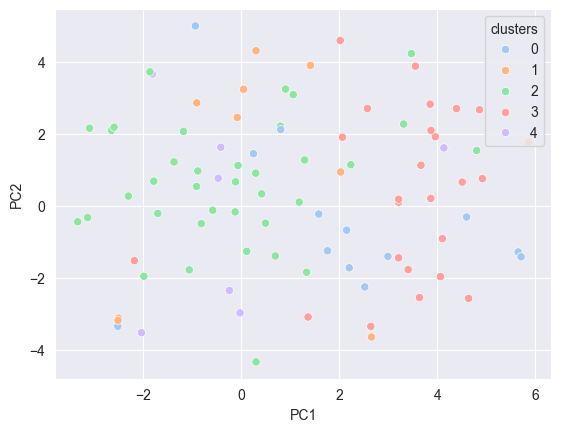

In [117]:
sns.scatterplot(data=df_tsne.assign(clusters=km.labels_), x='PC1', y='PC2', hue='clusters', palette='pastel');

# Profile
---

In [118]:
(df_tfidf
    .assign(Cluster=km.labels_)
    .groupby('Cluster')
    .apply(lambda fr: fr.mean(), include_groups=False)
    .T
    .rename(columns=lambda i: f"C{i}")
    .apply(lambda col: '; '.join(col.nlargest(10).index.tolist())).to_dict()
)

{'C0': 'father; family; brother; son; police; english; car; death; court; film',
 'C1': 'george; mr; don; says; town; story; eyes; shot; little; scene',
 'C2': 'tells; apartment; man; goes; house; later; room; police; mother; ship',
 'C3': 'war; family; army; camp; men; captain; city; man; orders; american',
 'C4': 'john; car; paul; water; takes; explains; gun; bar; father; men'}

In [124]:
(df_tfidf
 .assign(Cluster=km.labels_)
 .groupby('Cluster')
 .apply(lambda fr: fr.index[:10].tolist(), include_groups=False)
 .to_dict()
)

{0: ['The Godfather: Part II',
  'Sunset Blvd.',
  '12 Angry Men',
  'Amadeus',
  'Gladiator',
  'Doctor Zhivago',
  'Braveheart',
  'Goodfellas',
  "The King's Speech",
  'It Happened One Night'],
 1: ['Citizen Kane',
  "Singin' in the Rain",
  "It's a Wonderful Life",
  'Gandhi',
  'Unforgiven',
  'To Kill a Mockingbird',
  'The Good, the Bad and the Ugly',
  'A Place in the Sun',
  'The African Queen',
  'Double Indemnity'],
 2: ['The Shawshank Redemption',
  'Raging Bull',
  "One Flew Over the Cuckoo's Nest",
  'The Wizard of Oz',
  'Titanic',
  'Psycho',
  'Vertigo',
  'On the Waterfront',
  'West Side Story',
  'Star Wars'],
 3: ['The Godfather',
  "Schindler's List",
  'Casablanca',
  'Gone with the Wind',
  'Lawrence of Arabia',
  'Forrest Gump',
  'The Sound of Music',
  'The Bridge on the River Kwai',
  'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb',
  'Apocalypse Now'],
 4: ['Chinatown',
  'The Philadelphia Story',
  'The Deer Hunter',
  'The French C